In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'influencer_attention_bound'
varied_param_legend_label = 'Attention Bound'
varied_param_x_label = 'Influencer Attention Bound'

In [4]:
num_influencers = 1
num_agents = 5

attention_bounds = list(np.linspace(100, 1000, 10))

varied_param_values = attention_bounds

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=100,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=attention_bounds,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing influencer 5
Optimizing producer 0
Optimization succeeded (overall 0.002736875001573935s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.0015331250033341348s): nit=3, nfev=10, njev=5.
Optimizing producer 2
Optimization succeeded (overall 0.0003639579808805138s): nit=0, nfev=2, njev=1.
Optimizing producer 3
Optimization succeeded (overall 0.0015886670153122395s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.0019412910041864961s): nit=4, nfev=12, njev=6.
Iteration 0 / 100 done in 0.12167770799715072 seconds.
Total Social Welfare: 36.1014301280042
Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing influencer 5
Optimizing producer 0
Optimization succeeded (overall 0.0012999169994145632s): nit=2, nfev=8, njev=4.
Optimizing producer 1
O

In [6]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

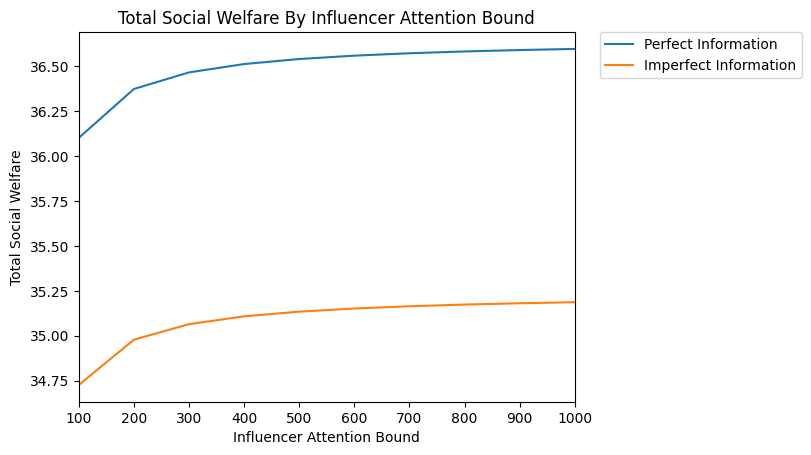

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

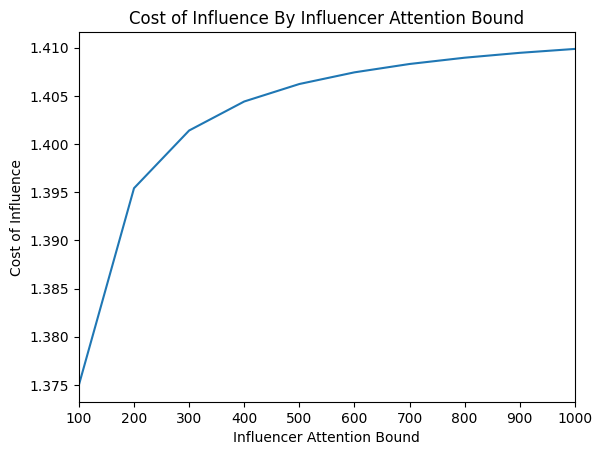

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

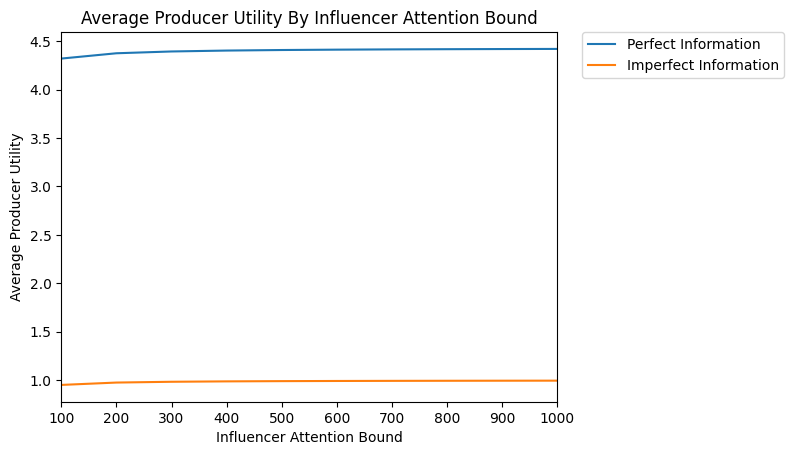

In [12]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

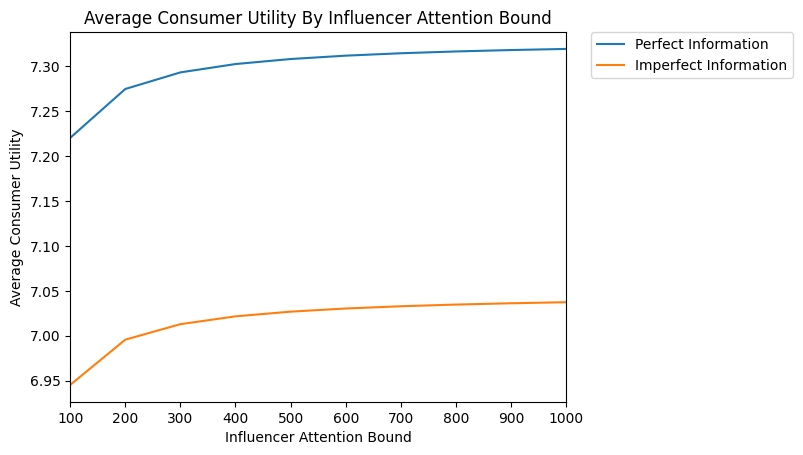

In [13]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

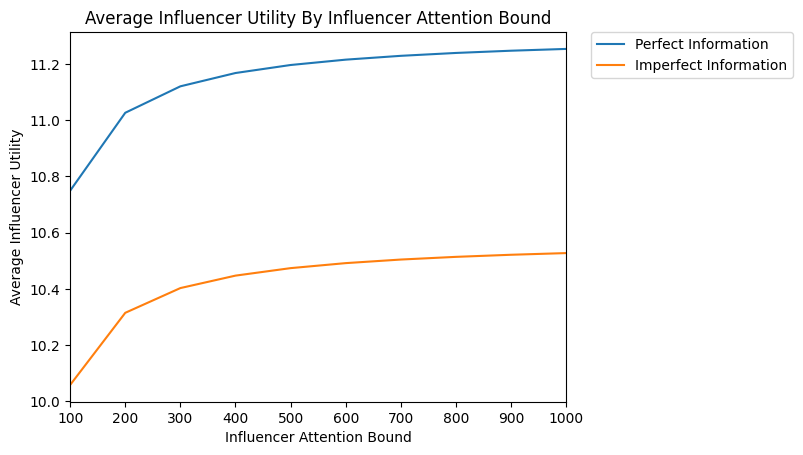

In [14]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

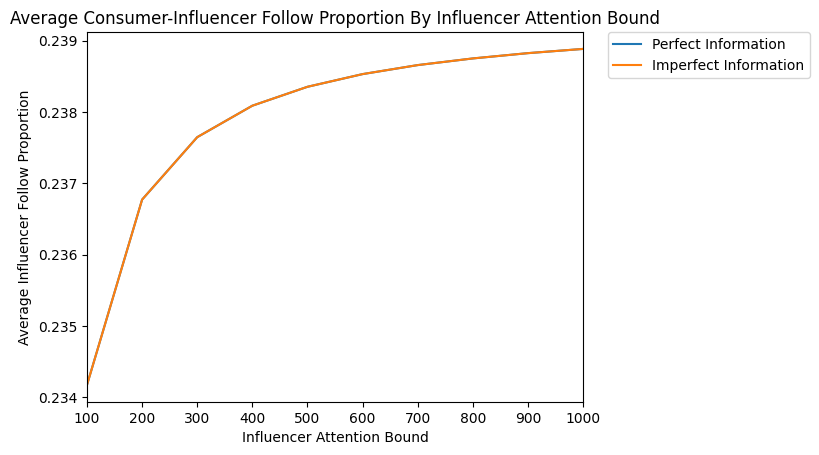

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

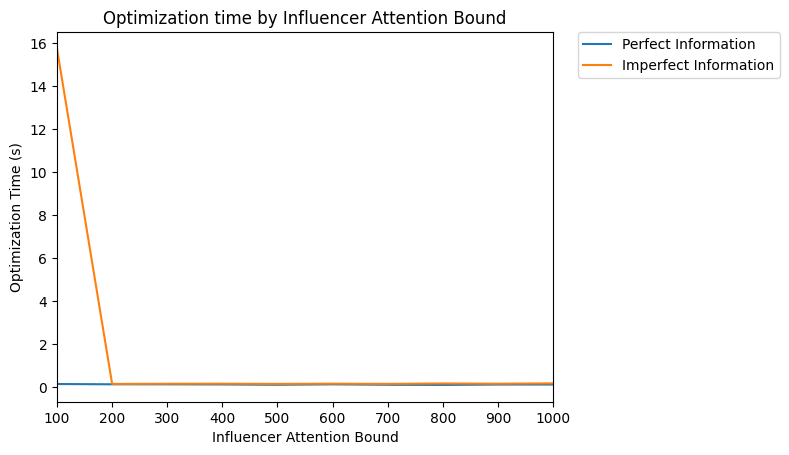

In [16]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

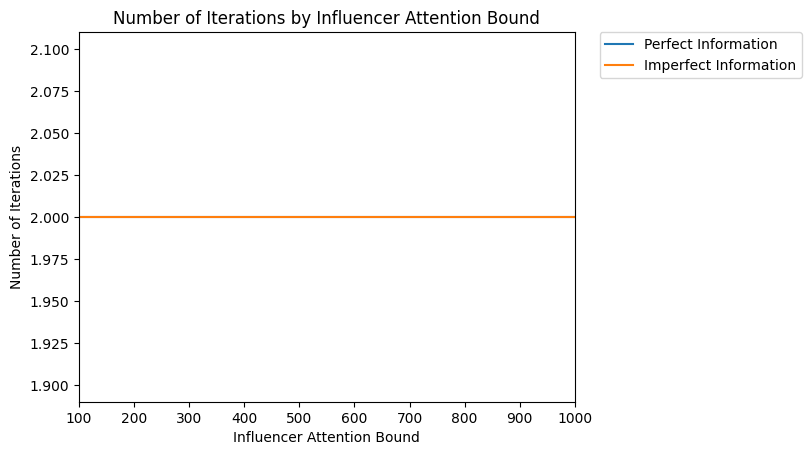

In [17]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

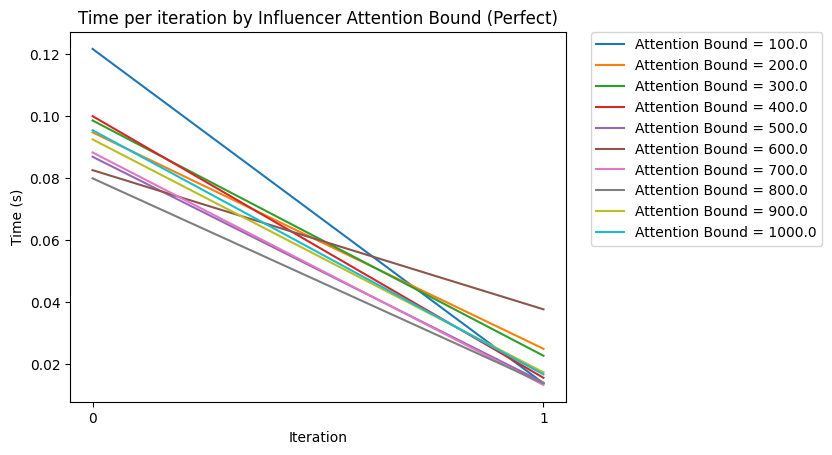

In [18]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

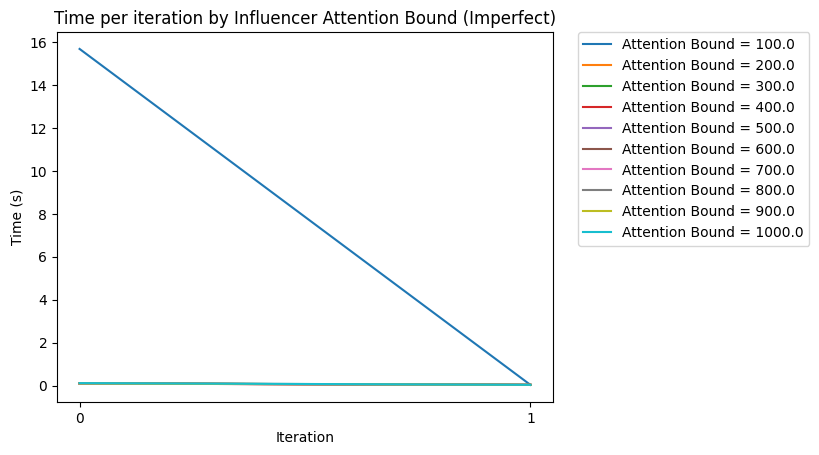

In [19]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

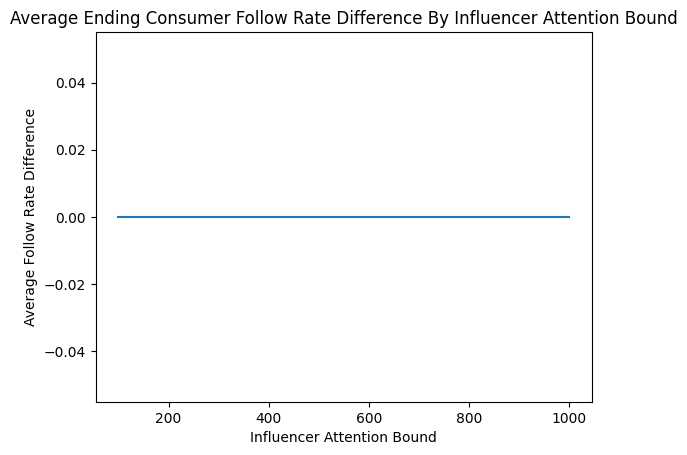

In [20]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

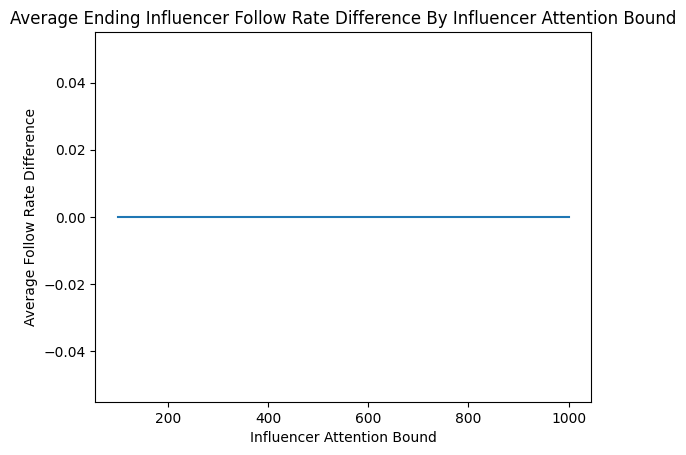

In [21]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

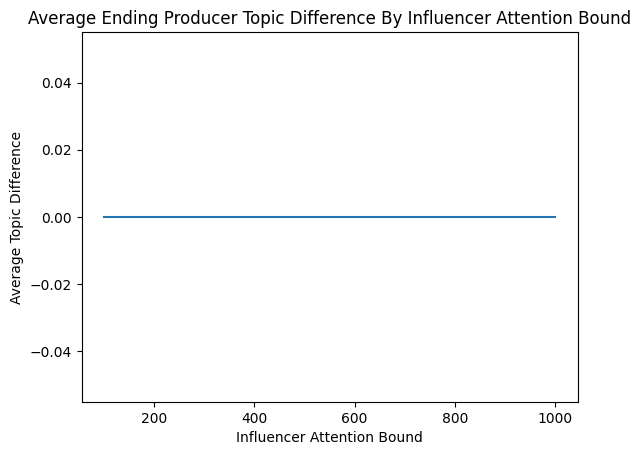

In [22]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1])
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

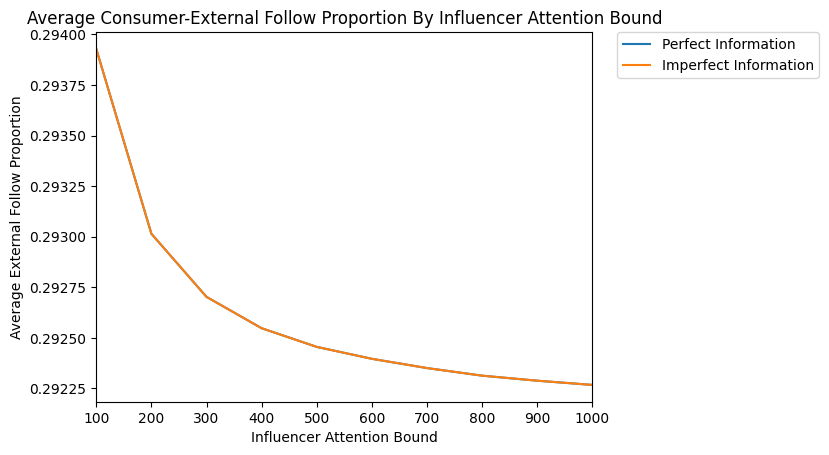

In [23]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

In [24]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 36.1014301280042, 36.1014869563176], 'total_producer_utility': [0, 21.604985262663995, 21.605042090977392], 'total_influencer_utility': [0, 10.749229768318235, 10.74919582712462], 'total_social_welfare': [0, 36.1014301280042, 36.1014869563176], 'average_consumer_rate_change': [0, 18.12418683973128, 0.0], 'average_producer_topic_change': [0, 0.21540980386187564, 0.0014264012108731517], 'average_influencer_rate_change': [0, 3.5182481105912218, 0.0], 'average_consumer_utility_change': [0, 7.22028602560084, 1.1365662679807542e-05], 'average_producer_utility_change': [0, 4.320997052532799, 1.1365662679629907e-05], 'average_influencer_utility_change': [0, 10.749229768318235, -3.3941193615660836e-05], 'consumer_stats': {0: {'utilities': [0, 6.135982219237996, 6.138321317996876], 'utility_change': [0, 6.135982219237996, 0.002339098758880276], 'optimization_times': [0.03136445800191723, 0.0013603330007754266], 'following_rates': [array([ 0.   

In [25]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 34.72648867594064, 34.72648867594064], 'total_producer_utility': [0, 4.754671708878041, 4.754671708878041], 'total_influencer_utility': [0, 10.058647316114204, 10.058647316114204], 'total_social_welfare': [0, 34.72648867594064, 34.72648867594064], 'average_consumer_rate_change': [0, 18.12418683973128, 0.0], 'average_producer_topic_change': [0, 4.514117291187718e-06, 0.0], 'average_influencer_rate_change': [0, 3.5182481105912218, 0.0], 'average_consumer_utility_change': [0, 6.945297735188127, 0.0], 'average_producer_utility_change': [0, 0.9509343417756082, 0.0], 'average_influencer_utility_change': [0, 10.058647316114204, 0.0], 'consumer_stats': {0: {'utilities': [0, 6.220922976963361, 6.220922976963361], 'utility_change': [0, 6.220922976963361, 0.0], 'optimization_times': [0.018022375006694347, 0.0011266660003457218], 'following_rates': [array([ 0.        , 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667, 16.666